In [2]:
%matplotlib inline

import warnings

import matplotlib as mpl
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings(action='once')

mpl.rcParams['figure.dpi'] = 150

MODEL_NAMES   = ['simple', 'all_conv', 'resnet20']
DATASET_NAMES = ['cifar10', 'cifar100_fine', 'cifar100_coarse', 'fashion_mnist']
CS_ORDER      = ['rgb', 'gray256', 'gray128', 'gray64', 'gray32', 'gray16', 'gray8']

In [4]:
def plot_acc_line(df, out_pdf=None, y_lim=None, net_name=None, hide_x=False, hide_y=False, title=None, ylabel=None):
    for mn in MODEL_NAMES:
        df['model'] = df['model'].str.replace('%s_' % (mn), '')
    for ds in DATASET_NAMES:
        df['model'] = df['model'].str.replace('%s_' % (ds), '')
    df['model'] = df['model'].str.replace('.h5', '')
    
    df['f_cs'] = df['color_space'] + df['n_colors'].map(str)
    df['f_cs'] = df['f_cs'].str.replace('rgb256', 'rgb')
    
    fig, ax = plt.subplots()
    
    for cs in CS_ORDER:
        aux = df[df['model'] == cs]
        accs = [aux[aux['f_cs'] == i]['test_acc'].values for i in CS_ORDER]
        accs = [i[0] for i in accs if len(i) > 0]
        if len(accs) == 6:
            accs = [accs[0]] + accs
        
        if net_name is not None:
            plt.plot(accs, label='%s_%s' % (net_name, cs))
        else: 
            plt.plot(accs, label=cs)
        
    ax.set_xticklabels([''] + CS_ORDER, rotation=-30)
    
    if hide_x:
        ax.xaxis.set_ticklabels([])
    
    if hide_y:
        ax.yaxis.set_ticklabels([])
    
    if y_lim is not None:
        ax.set_ylim(y_lim)
    
    ax.legend(loc='best')
    
    if title is not None:
        plt.suptitle(title, fontsize=16)
        
    if ylabel is not None:
        plt.ylabel(ylabel, fontsize=16)
    
    if out_pdf is not None:
        plt.savefig(out_pdf, format='pdf', bbox_inches='tight')
    
    plt.show()

In [9]:
def plot_acc_line_noise(df, out_pdf=None, y_lim=None, net_name=None, hide_y=False, title=None, ylabel=None):
    for mn in MODEL_NAMES:
        df['model'] = df['model'].str.replace('%s_' % (mn), '')
    for ds in DATASET_NAMES:
        df['model'] = df['model'].str.replace('%s_' % (ds), '')
    df['model'] = df['model'].str.replace('.h5', '')
    
    df['noise_level'] = df['dataset'].str.replace('fashion_mnist-', '')
    noise_leves = df['noise_level'].unique()
    
    fig, ax = plt.subplots()
    
    for cs in CS_ORDER:
        aux = df[df['model'] == cs]
        accs = [aux[aux['noise_level'] == i]['test_acc'].values[0] for i in noise_leves]
        
        if net_name is not None:
            plt.plot(accs, label='%s_%s' % (net_name, cs))
        else: 
            plt.plot(accs, label=cs)
        
    plt.legend(labels=CS_ORDER)
    plt.xticks([0, 1, 2])
    ax.set_xticklabels([''] + noise_leves, rotation=-30)
#     ax.set_ylim((0.5, 1.0))
    ax.legend(loc='best')
        
    if hide_y:
        ax.yaxis.set_ticklabels([])
    
    if y_lim is not None:
        ax.set_ylim(y_lim)
    
    if title is not None:
        plt.suptitle(title, fontsize=16)
        
    if ylabel is not None:
        plt.ylabel(ylabel, fontsize=16)
    
    if out_pdf is not None:
        plt.savefig(out_pdf, format='pdf', bbox_inches='tight')
    
    plt.show()

# CIFAR-10 results

In [5]:
cifar10_results = pd.read_csv('results_cifar10.csv')

## results for "original" NNs

In [6]:
cifar10_orig_results = cifar10_results[cifar10_results['clf'] == 'cnn']

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


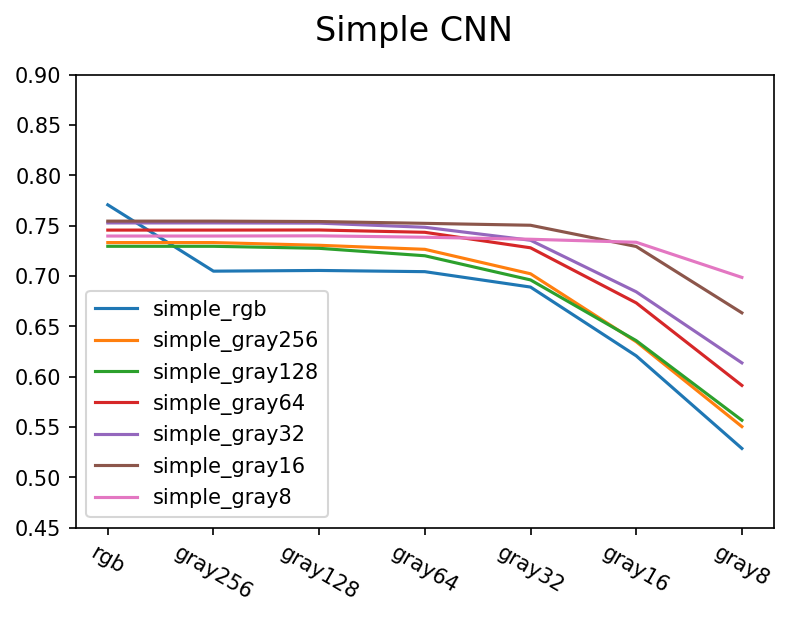

In [52]:
simple_orig = cifar10_orig_results[cifar10_orig_results['model'].str.contains('simple')]
plot_acc_line(simple_orig, 'ims/simple_orig.pdf', (0.45, 0.9), net_name='simple', title='Simple CNN')

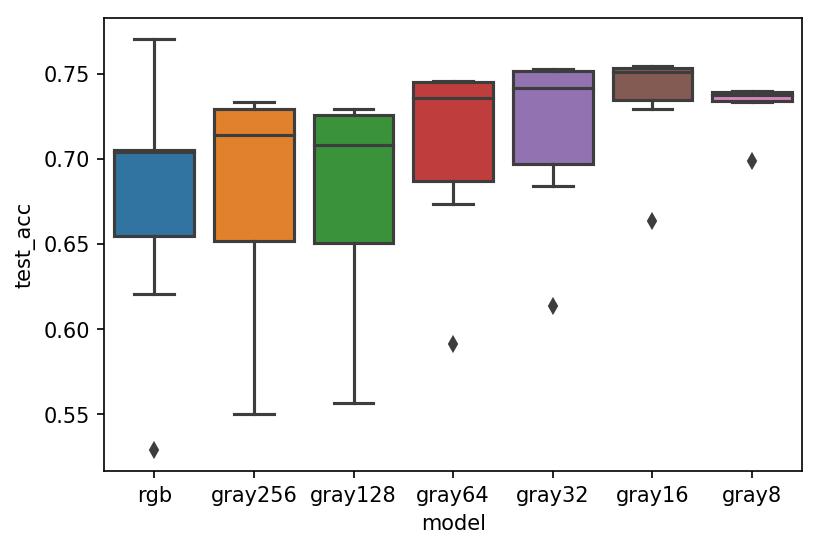

In [7]:
sb.boxplot(x='model', y='test_acc', data=simple_orig[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


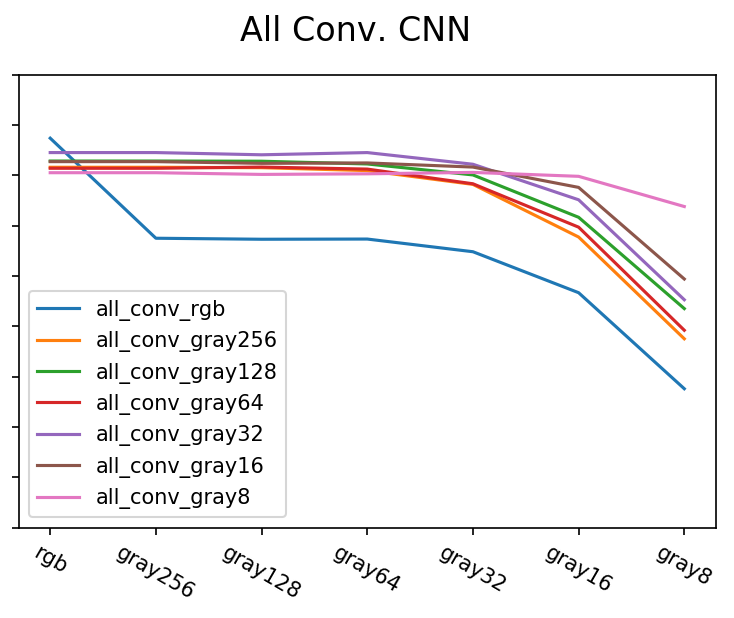

In [54]:
all_conv_orig = cifar10_orig_results[cifar10_orig_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_orig, 'ims/all_conv_orig.pdf', (0.45, 0.9), hide_y=True, net_name='all_conv', title='All Conv. CNN')

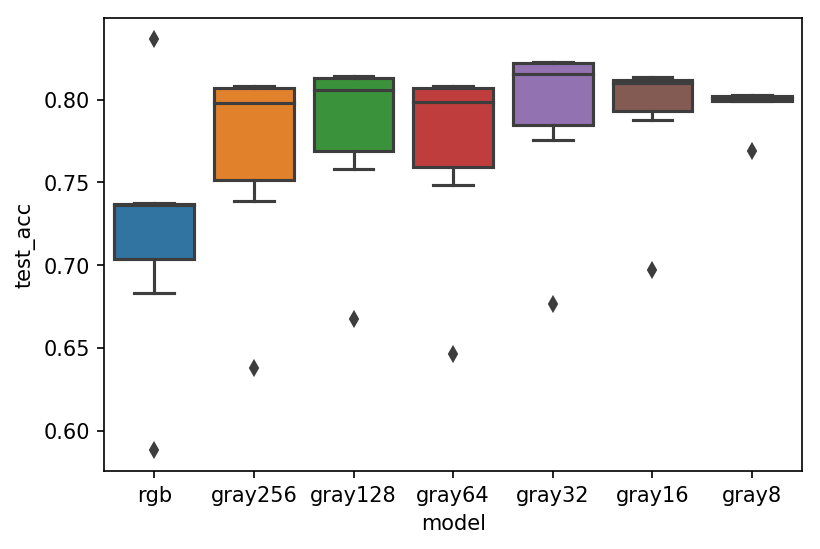

In [9]:
sb.boxplot(x='model', y='test_acc', data=all_conv_orig[['model', 'test_acc']], order=CS_ORDER)

### ResNet 20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


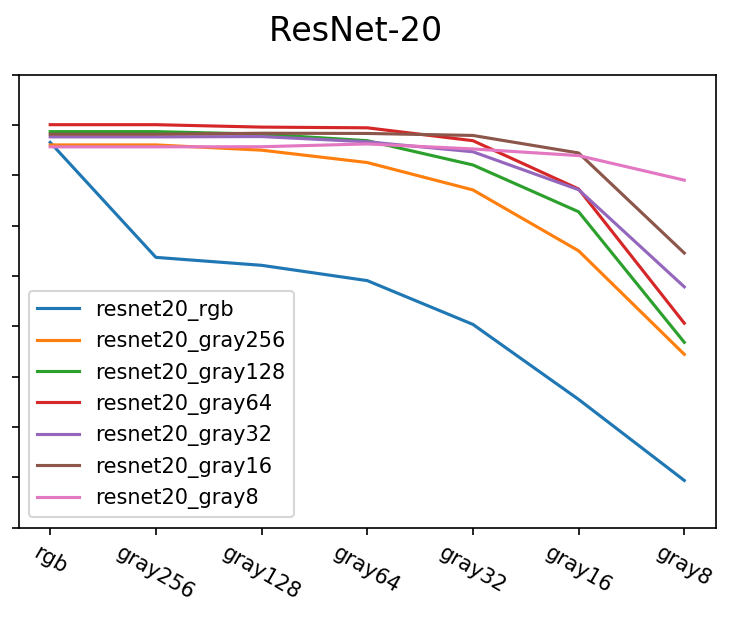

In [55]:
resnet20_orig = cifar10_orig_results[cifar10_orig_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_orig, 'ims/resnet20_orig.pdf', (0.45, 0.9), hide_y=True, net_name='resnet20', title='ResNet-20')

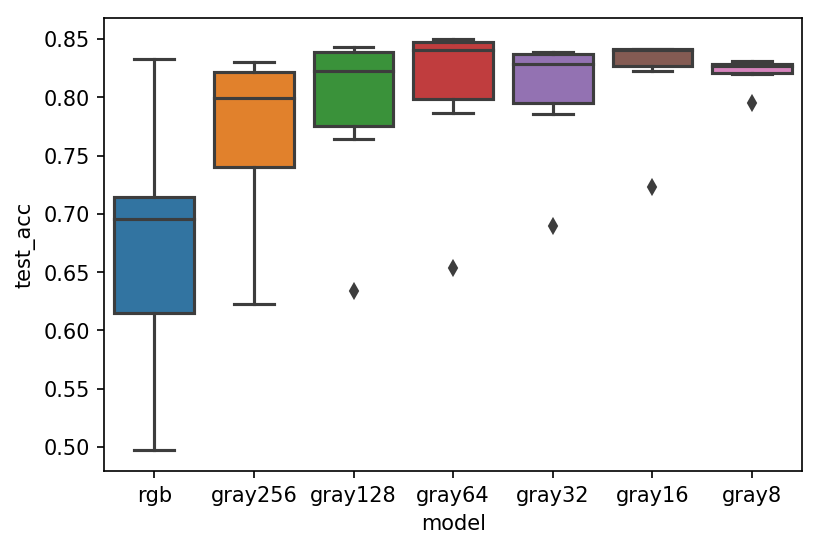

In [11]:
sb.boxplot(x='model', y='test_acc', data=resnet20_orig[['model', 'test_acc']], order=CS_ORDER)

## results for "feture" NNs

In [40]:
cifar10_features_results = cifar10_results[cifar10_results['clf'] == 'lr']

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


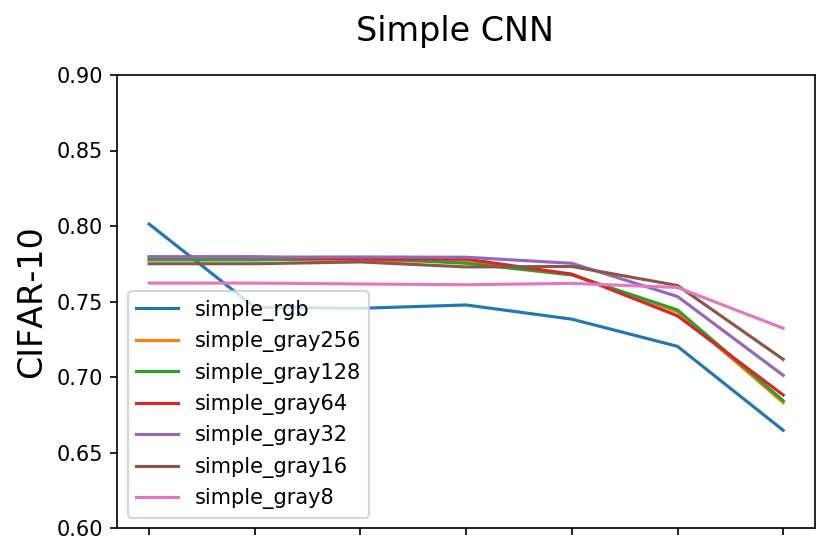

In [62]:
simple_features = cifar10_features_results[cifar10_features_results['model'].str.contains('simple')]
plot_acc_line(simple_features, 'ims/simple_cifar10_features.pdf', (0.6, 0.9), hide_x=True, net_name='simple', title='Simple CNN', ylabel='CIFAR-10')

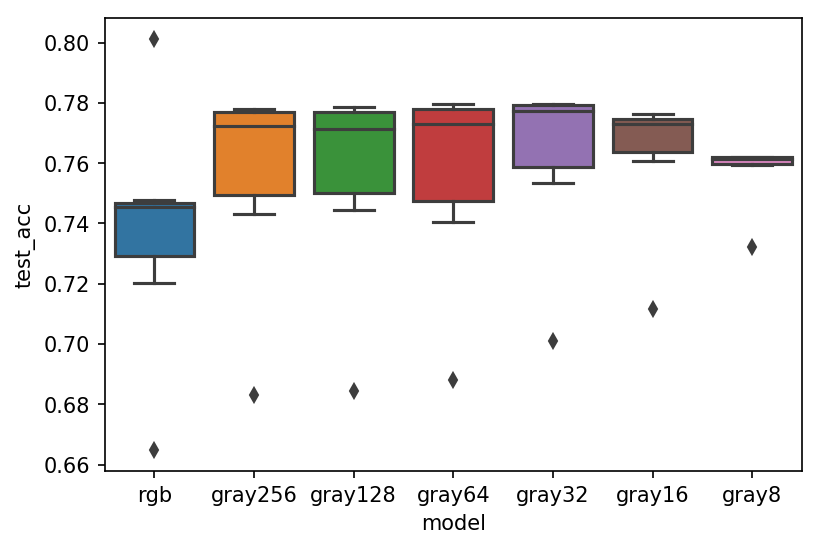

In [14]:
sb.boxplot(x='model', y='test_acc', data=simple_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


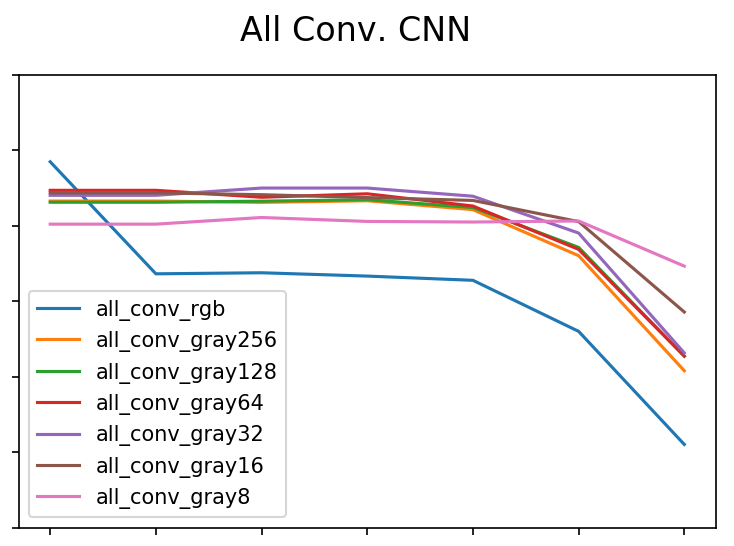

In [59]:
all_conv_features = cifar10_features_results[cifar10_features_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_features, 'ims/all_conv_cifar10_features.pdf', (0.6, 0.9), hide_x=True, hide_y=True, net_name='all_conv', title='All Conv. CNN')

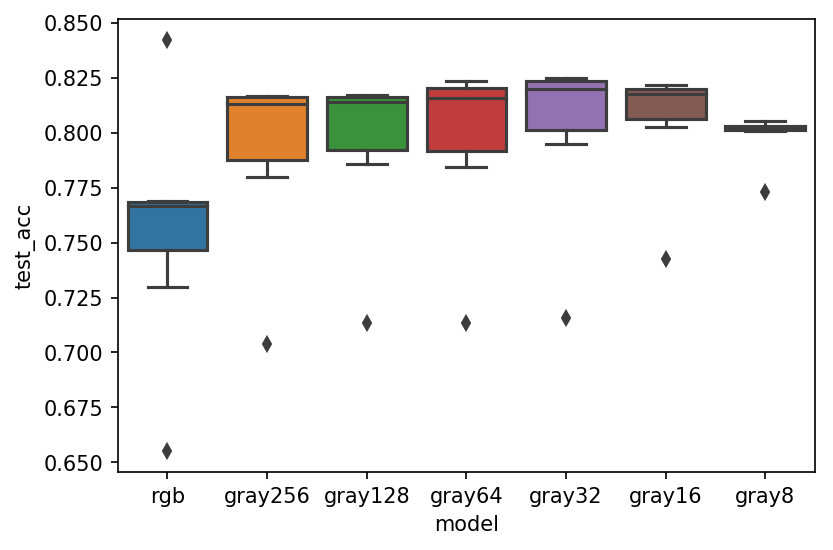

In [16]:
sb.boxplot(x='model', y='test_acc', data=all_conv_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


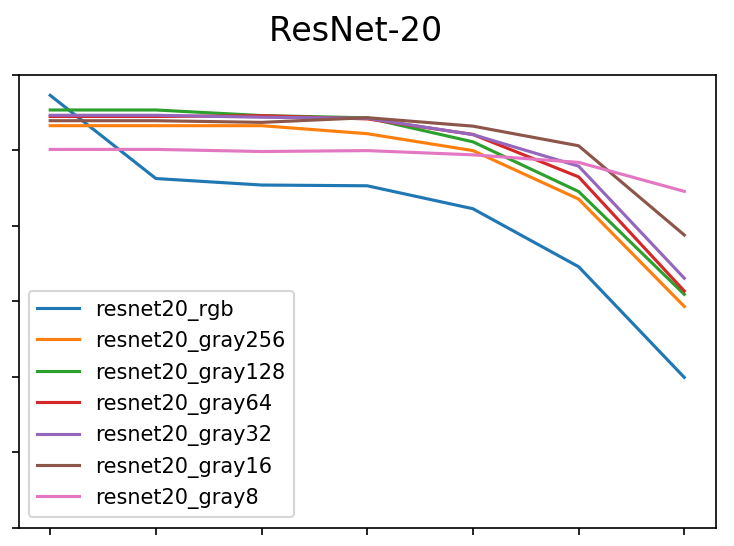

In [60]:
resnet20_features = cifar10_features_results[cifar10_features_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_features, 'ims/resnet20_cifar10_features.pdf', (0.6, 0.9), hide_x=True, hide_y=True, net_name='resnet20', title='ResNet-20')

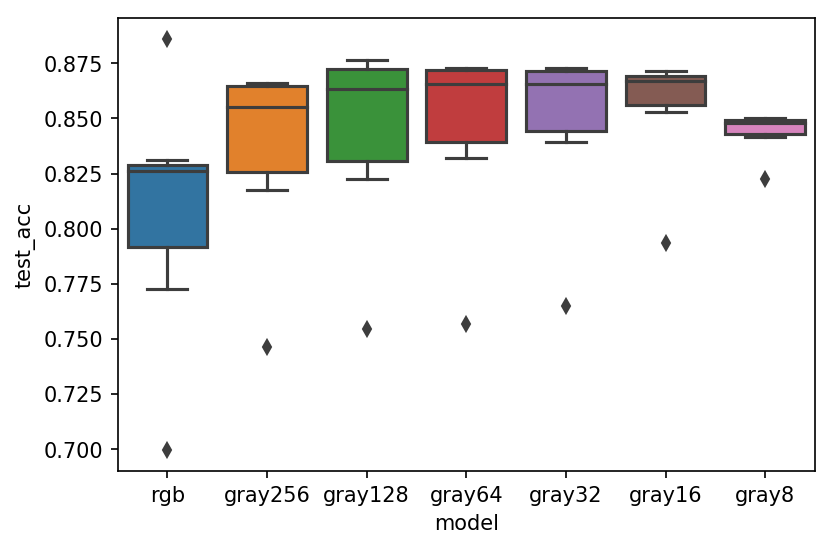

In [18]:
sb.boxplot(x='model', y='test_acc', data=resnet20_features[['model', 'test_acc']], order=CS_ORDER)

# CIFAR-100_fine results

In [63]:
cifar100_fine_results = pd.read_csv('results_cifar100_fine.csv')

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


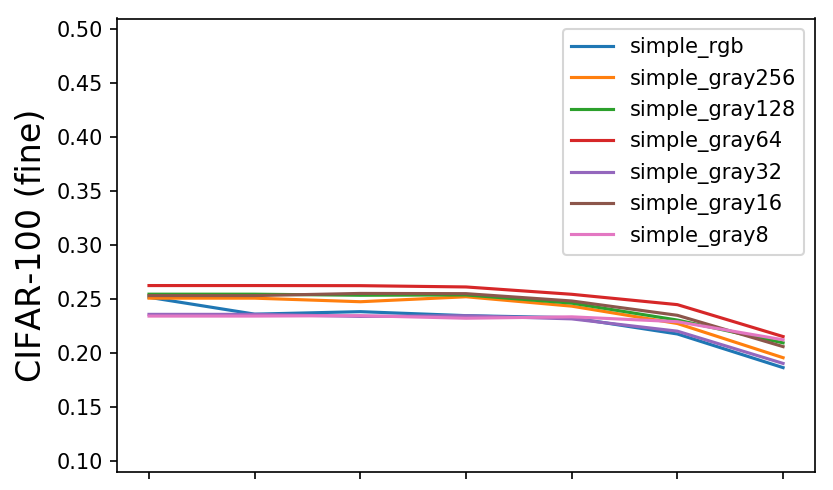

In [80]:
simple_cf_features = cifar100_fine_results[cifar100_fine_results['model'].str.contains('simple')]
plot_acc_line(simple_cf_features, 'ims/simple_cifar100_fine_features.pdf', (0.09, 0.51), hide_x=True, net_name='simple', ylabel='CIFAR-100 (fine)')

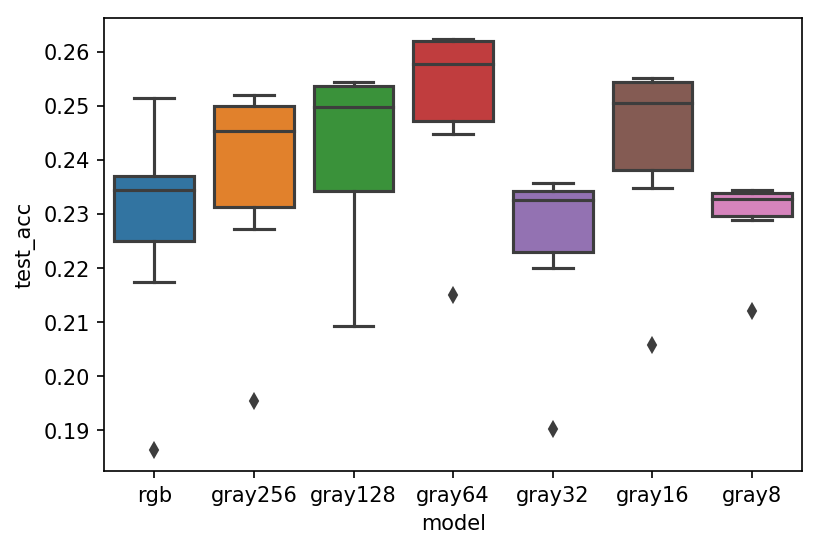

In [21]:
sb.boxplot(x='model', y='test_acc', data=simple_cf_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


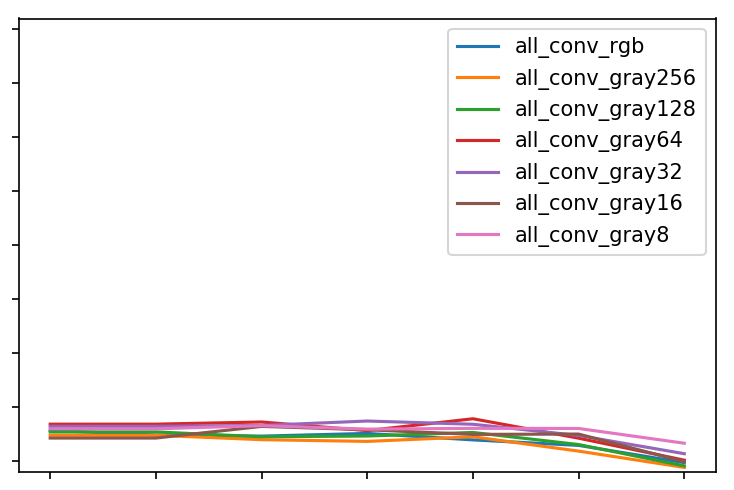

In [78]:
all_conv_cf_features = cifar100_fine_results[cifar100_fine_results['model'].str.contains('all_conv')]
# plot_acc_line(all_conv_cf_features)
plot_acc_line(all_conv_cf_features, 'ims/all_conv_cifar100_fine_features.pdf', (0.09, 0.51), hide_y=True, hide_x=True, net_name='all_conv')

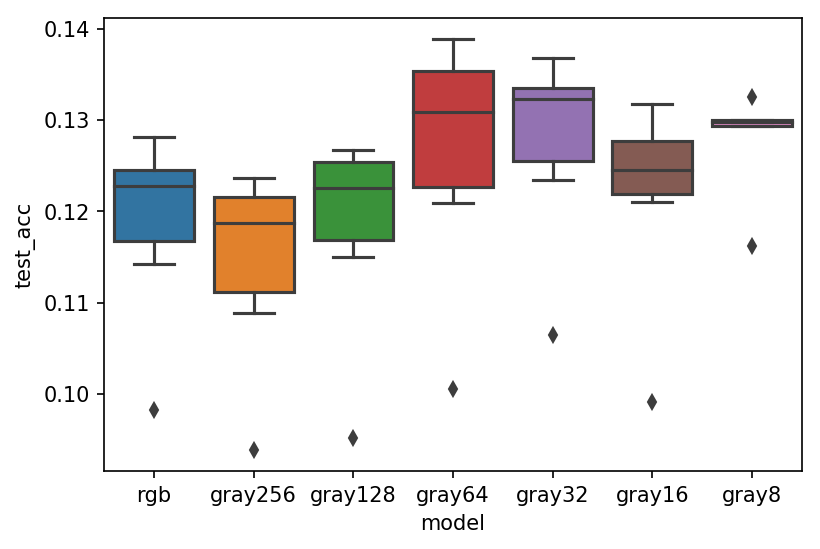

In [23]:
sb.boxplot(x='model', y='test_acc', data=all_conv_cf_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


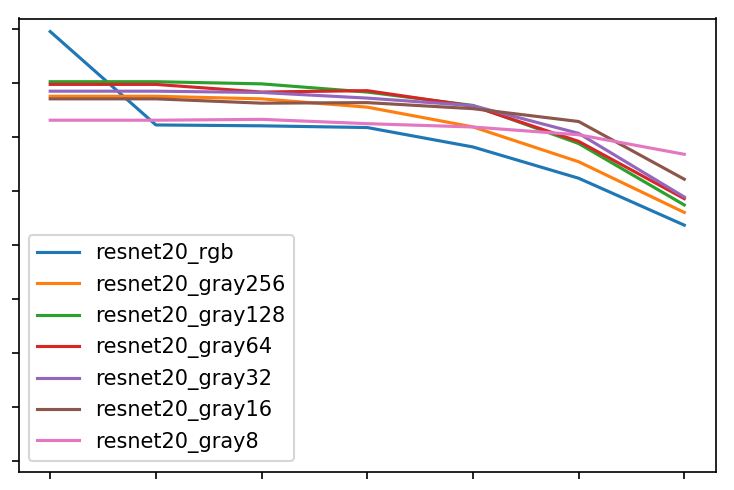

In [81]:
resnet20_cf_features = cifar100_fine_results[cifar100_fine_results['model'].str.contains('resnet20')]
# plot_acc_line(resnet20_cf_features)
plot_acc_line(resnet20_cf_features, 'ims/resnet20_cifar100_fine_features.pdf', (0.09, 0.51), hide_y=True, hide_x=True, net_name='resnet20')

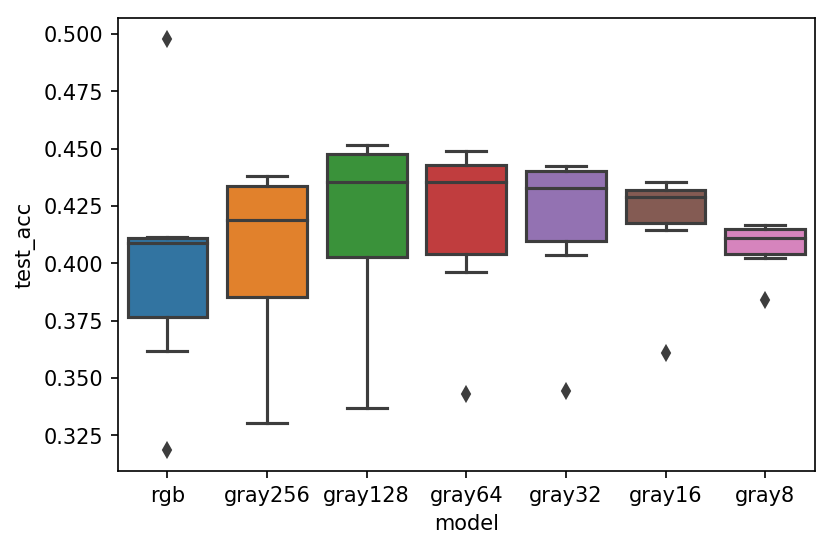

In [25]:
sb.boxplot(x='model', y='test_acc', data=resnet20_cf_features[['model', 'test_acc']], order=CS_ORDER)

# CIFAR-100_coarse results

In [83]:
cifar100_coarse_results = pd.read_csv('results_cifar100_coarse.csv')

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


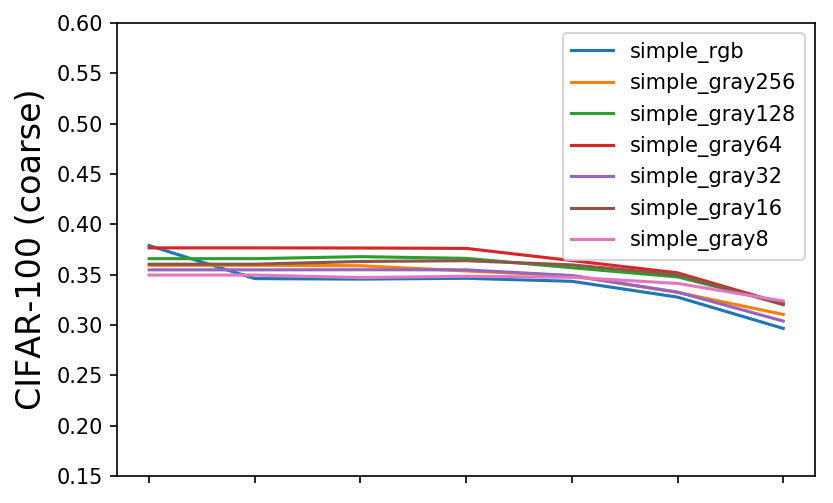

In [86]:
simple_cc_features = cifar100_coarse_results[cifar100_coarse_results['model'].str.contains('simple')]
plot_acc_line(simple_cc_features, 'ims/simple_cifar100_coarse_features.pdf', (0.15, 0.6), hide_y=False, hide_x=True, net_name='simple', ylabel='CIFAR-100 (coarse)')

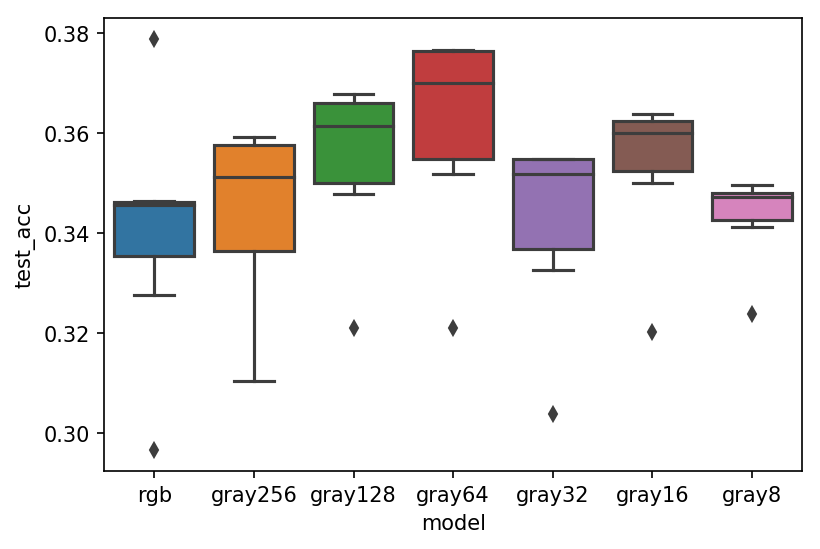

In [28]:
sb.boxplot(x='model', y='test_acc', data=simple_cc_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


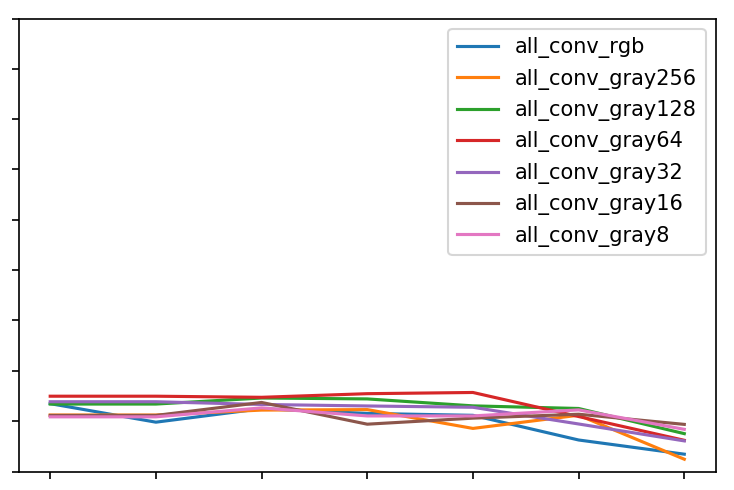

In [90]:
all_conv_cc_features = cifar100_coarse_results[cifar100_coarse_results['model'].str.contains('all_conv')]
plot_acc_line(all_conv_cc_features, 'ims/all_conv_cifar100_coarse_features.pdf', (0.15, 0.6), hide_y=True, hide_x=True, net_name='all_conv')

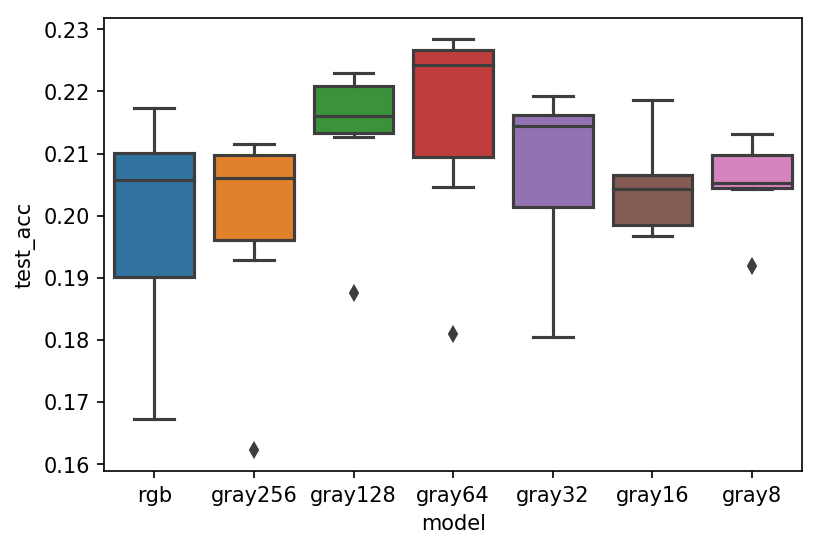

In [30]:
sb.boxplot(x='model', y='test_acc', data=all_conv_cc_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


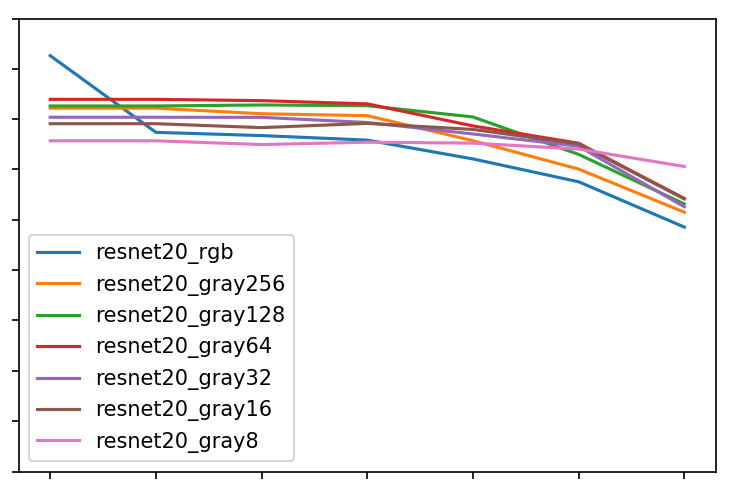

In [89]:
resnet20_cc_features = cifar100_coarse_results[cifar100_coarse_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_cc_features, 'ims/resnet20_cifar100_coarse_features.pdf', (0.15, 0.6), hide_y=True, hide_x=True, net_name='resnet20')

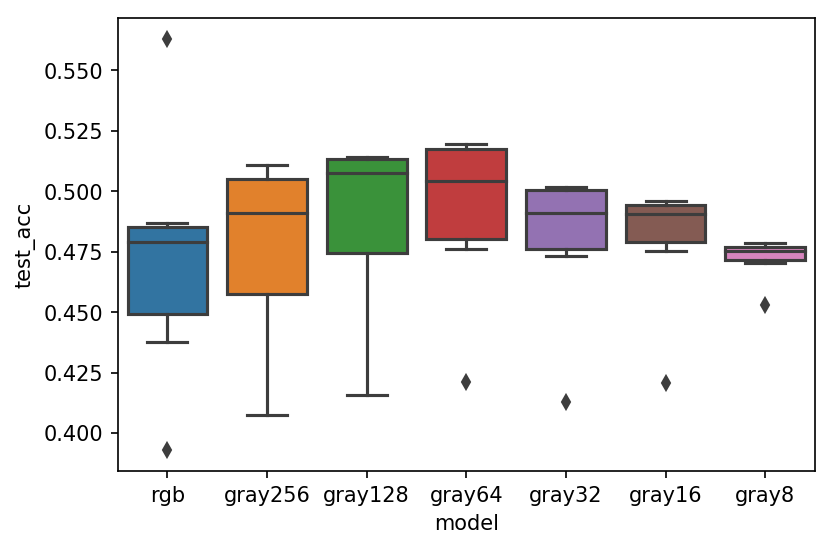

In [32]:
sb.boxplot(x='model', y='test_acc', data=resnet20_cc_features[['model', 'test_acc']], order=CS_ORDER)

# Fashion-MNIST results

In [91]:
fashion_mnist_results = pd.read_csv('results_fashion_mnist.csv')

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


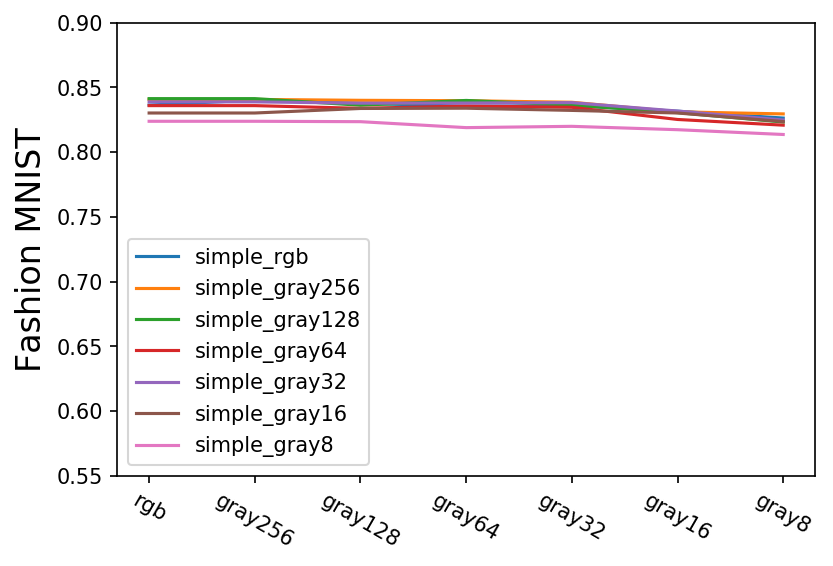

In [94]:
simple_fm_features = fashion_mnist_results[fashion_mnist_results['model'].str.contains('simple')]
plot_acc_line(simple_fm_features, 'ims/simple_fashion_mnist_features.pdf', (0.55, 0.9), net_name='simple', ylabel='Fashion MNIST')

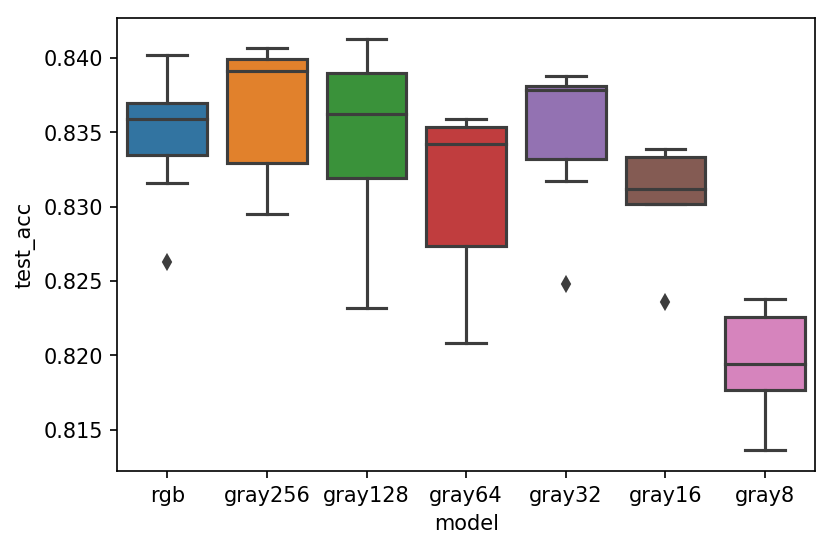

In [35]:
sb.boxplot(x='model', y='test_acc', data=simple_fm_features[['model', 'test_acc']], order=CS_ORDER)

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


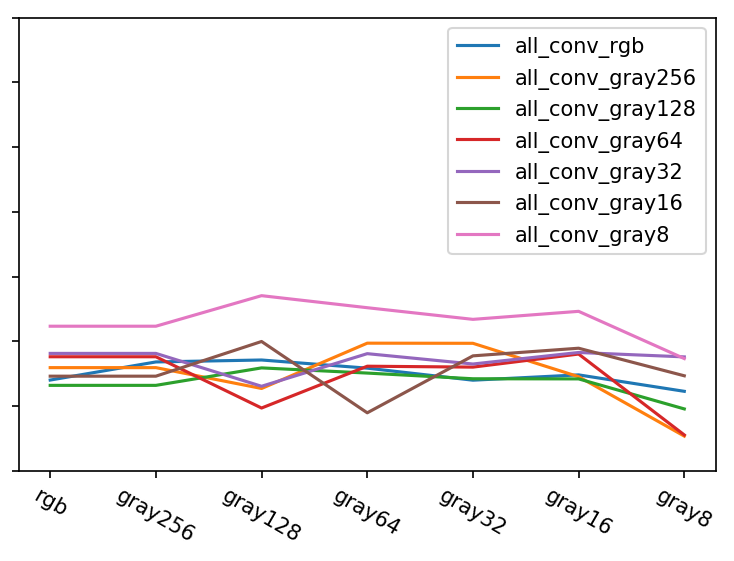

In [96]:
all_conv_fm_features = fashion_mnist_results[fashion_mnist_results['model'].str.contains('all_conv')]
# plot_acc_line(all_conv_fm_features)
plot_acc_line(all_conv_fm_features, 'ims/all_conv_fashion_mnist_features.pdf', (0.55, 0.9), net_name='all_conv', hide_y=True)

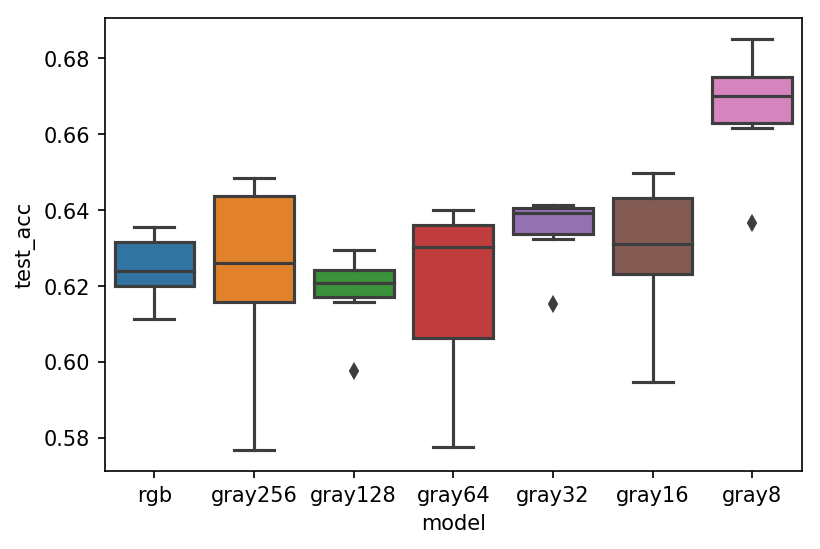

In [37]:
sb.boxplot(x='model', y='test_acc', data=all_conv_fm_features[['model', 'test_acc']], order=CS_ORDER)

### resnet20 results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


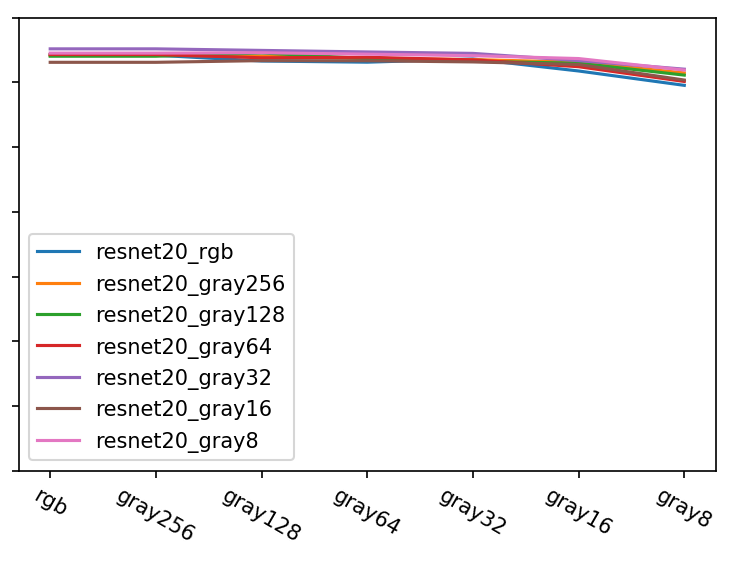

In [98]:
resnet20_fm_features = fashion_mnist_results[fashion_mnist_results['model'].str.contains('resnet20')]
plot_acc_line(resnet20_fm_features, 'ims/resnet20_fashion_mnist_features.pdf', (0.55, 0.9), net_name='resnet20', hide_y=True)

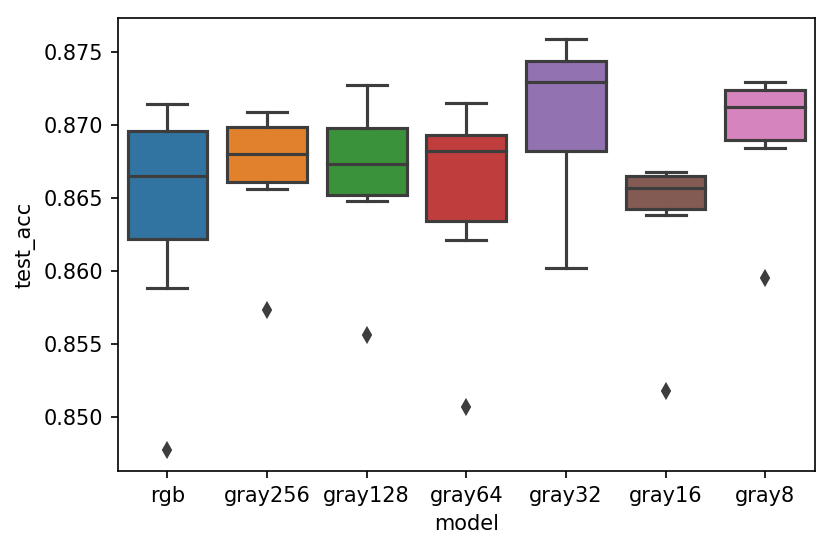

In [39]:
sb.boxplot(x='model', y='test_acc', data=resnet20_fm_features[['model', 'test_acc']], order=CS_ORDER)

# Fashion-MNIST results (with noise)

In [6]:
fm_noise_results = pd.read_csv('results_fashion_mnist-noise.csv')
fm_noise_results = fm_noise_results[fm_noise_results['color_space'] != 'rgb']

### simple net results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


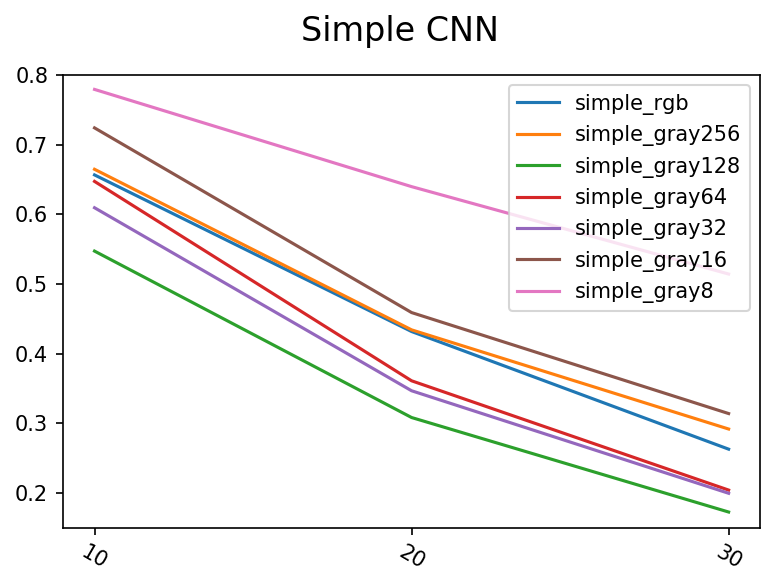

In [19]:
simple_noise = fm_noise_results[fm_noise_results['model'].str.contains('simple')]
# sb.boxplot(x='model', y='test_acc', data=simple_noise[['model', 'test_acc']])
# plot_acc_line_noise(simple_noise)
plot_acc_line_noise(simple_noise, out_pdf='ims/simple_fashion_mnist_noise.pdf', y_lim=(0.15, 0.8), net_name='simple', hide_y=False, title='Simple CNN')

### all_conv results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


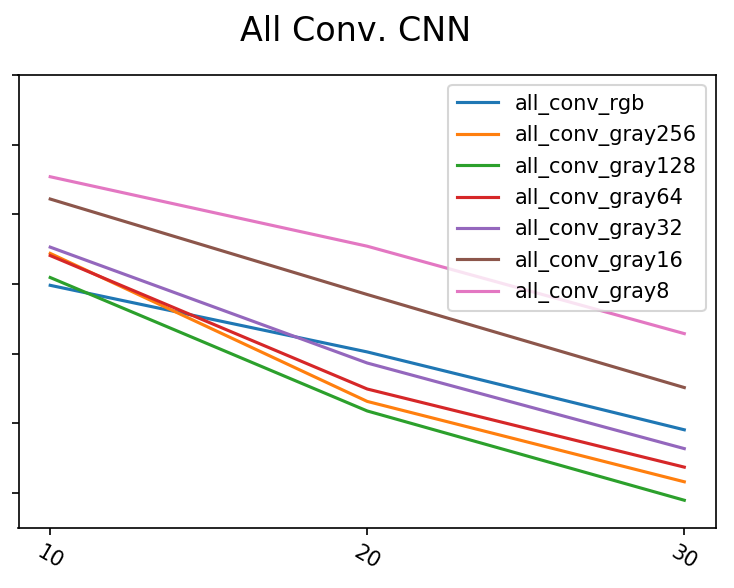

In [17]:
all_conv_noise = fm_noise_results[fm_noise_results['model'].str.contains('all_conv')]
plot_acc_line_noise(all_conv_noise, out_pdf='ims/all_conv_fashion_mnist_noise.pdf', y_lim=(0.15, 0.8), net_name='all_conv', hide_y=True, title='All Conv. CNN')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


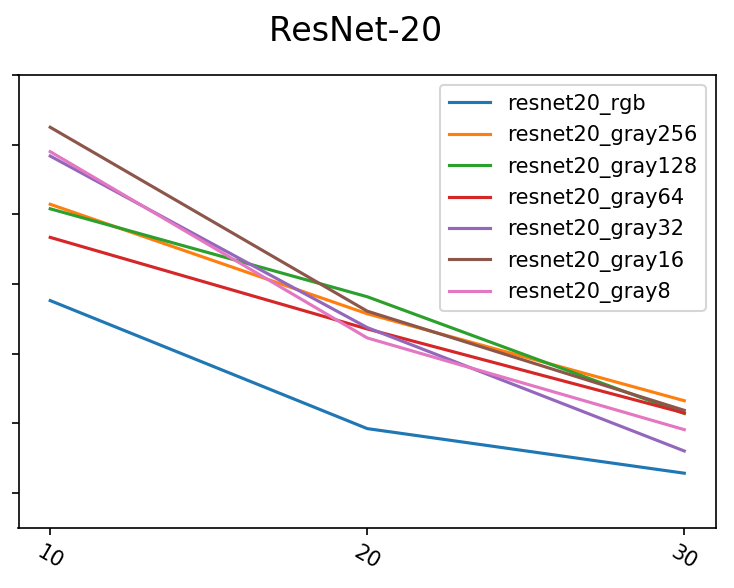

In [18]:
resnet_noise = fm_noise_results[fm_noise_results['model'].str.contains('resnet20')]
plot_acc_line_noise(resnet_noise, out_pdf='ims/resnet20_fashion_mnist_noise.pdf', y_lim=(0.15, 0.8), net_name='resnet20', hide_y=True, title='ResNet-20')